# Non Linear Models

In [23]:
## Decision Tree

In [3]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
df = california.frame

## Decision Tree

Decision trees are one of the most intuitive and versatile machine learning algorithms out there. Whether you're predicting a class label like “spam” vs “not spam” or forecasting a continuous value like house price, decision trees can be an excellent first model to try. They’re easy to visualize, easy to explain, and often perform well out-of-the-box.

At their core, decision trees are flowchart-like structures where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a prediction.

They can be used for:
- Classification tasks: where the goal is to predict a category (e.g., whether a patient has a disease or not).
- Regression tasks: where the goal is to predict a numeric value (e.g., the price of a house).

The algorithm works by recursively splitting the data into smaller groups based on feature values, trying to make each group as pure (i.e., homogeneous) as possible in terms of the target variable.



While decision trees are simple to understand, their behavior can be finely controlled using several important hyperparameters. These affect how the tree grows, when it stops, and how it splits the data.

Key hyperparameters:
- max_depth What it does: Limits the number of levels in the tree.
    - Why it matters: A deeper tree can model more complex patterns but also risks overfitting.
    - Typical usage: Setting a reasonable max_depth helps control model complexity.

- min_samples_split What it does: The minimum number of samples required to split a node.
    - Why it matters: Higher values prevent the tree from creating very small splits that may not generalize well.
    - Typical usage: Common values are in the range of 2 to 10 for small datasets, higher for larger ones.

- min_samples_leaf What it does: The minimum number of samples that a leaf node must have.
    - Why it matters: Helps avoid leaves that are too specific to training data (i.e., overfitting).
    - Typical usage: Values like 1, 5, or a percentage (e.g., 0.01) depending on dataset size.

- max_features What it does: The number of features to consider when looking for the best split.
    - Why it matters: Reducing this can speed up training and introduce randomness (useful in ensembles like Random Forests).
    - Typical usage: sqrt for classification, log2 or a fixed number, None (use all features).

- criterion What it does: The function used to evaluate the quality of a split.
    - For classification: "gini" (default) or "entropy"
    - For regression: "squared_error" (default), "absolute_error", etc.
    - Why it matters: Different criteria might yield slightly different trees; "gini" is typically faster than "entropy".

- max_leaf_nodes What it does: Sets a limit on the number of terminal nodes (leaves).
    - Why it matters: A regularization technique that simplifies the model.

- min_impurity_decrease What it does: A node will be split only if this split induces a decrease in impurity greater than or equal to this value.
    - Why it matters: Offers fine-grained control over the growth of the tree.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ISLP.models import summarize
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation MSE scores: ", -scores)
# Negative MSE (because Scikit-learn returns negative values)
print("Average MSE: ", -scores.mean())  # Average MSE across all folds

print("\nMAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Cross-validation MSE scores:  [0.81086528 0.73157388 0.77900631 0.90901644 0.85030349]
Average MSE:  0.8161530811099176

MAE: 0.4557622892441861
RMSE: 0.7068996727915191
R²: 0.6186632145457622


In [16]:
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [17]:
### Bayesian Optimisation Search

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real

import numpy as np

# -------------------------
# Train-test split
# -------------------------
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# Bayesian Optimisation Search Space
# -------------------------
param_space = {
    "max_depth": Integer(1, 40),
    "min_samples_split": Integer(2, 50),
    "min_samples_leaf": Integer(1, 20),
    "criterion": Categorical(["squared_error", "friedman_mse"]),
    "max_features": Integer(1, 40),
}

# -------------------------
# Set up Bayesian Search
# -------------------------
opt = BayesSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    search_spaces=param_space,
    n_iter=32,                      # number of optimisation rounds
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

# -------------------------
# Fit Bayesian Optimisation
# -------------------------
opt.fit(X_train, y_train)

print("Best Parameters Found:")
print(opt.best_params_)

# -------------------------
# Evaluate on Test Set
# -------------------------
best_model = opt.best_estimator_

y_pred = best_model.predict(X_test)

print("\nModel Performance on Test Set:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# -------------------------
# Cross-validation MSE (neg val → make positive)
# -------------------------
cv_scores = -cross_val_score(best_model, X, y, cv=5, scoring="neg_mean_squared_error")

print("\nCross-Validation MSE scores:", cv_scores)
print("Average MSE:", cv_scores.mean())


Best Parameters Found:
OrderedDict({'criterion': 'friedman_mse', 'max_depth': 37, 'max_features': 24, 'min_samples_leaf': 16, 'min_samples_split': 25})

Model Performance on Test Set:
MAE: 0.40176846720219395
RMSE: 0.5946284127979085
R²: 0.7301735907050855

Cross-Validation MSE scores: [0.70447976 0.5031711  0.53596708 0.48719341 0.5826275 ]
Average MSE: 0.5626877721149668


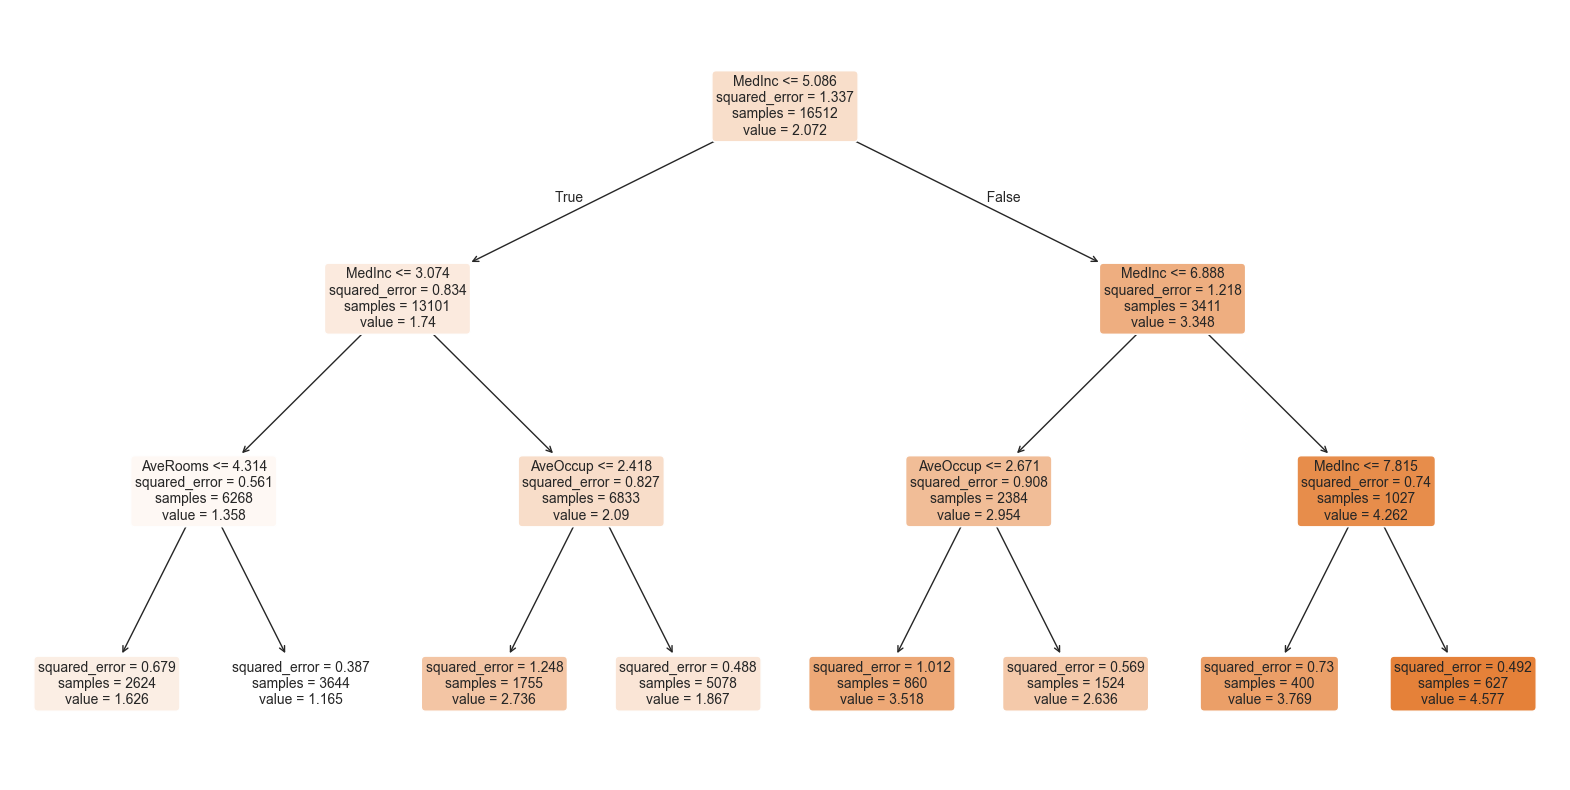

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

small_tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    small_tree,                 # use your optimised model
    filled=True,
    feature_names=X.columns,
    rounded=True,
    fontsize=10
)
plt.show()


## Random Forest

Random Forests are among the most widely used and versatile machine learning algorithms — loved for their simplicity, robustness, and strong performance out of the box. If you already know how Decision Trees work, then you're halfway there. A Random Forest is essentially a team of Decision Trees working together. And when teams work well, they outperform individuals — that’s the essence of ensemble learning.

A Random Forest is an ensemble of decision trees, built using two key techniques:

- Bagging (Bootstrap Aggregation): Each tree is trained on a different random sample of the data (with replacement).
- Feature Randomness: Each split in a tree considers a random subset of features, making each tree unique.

The final prediction is:
- Regression: the average of predictions from all trees.
- Classification: the majority vote from all trees.

This process reduces overfitting (a problem with single deep trees) and improves generalization.

Unlike a single decision tree, a Random Forest introduces randomness, so results can vary slightly unless you set the random_state. However, once fixed, predictions are deterministic.

Random Forests are great for:
- Classification and regression tasks
- Tabular datasets
- Handling missing values, non-linear relationships, and interactions between variables
- Reducing overfitting from decision trees

Most important hyperparameters:
- n_estimators What it does: Number of trees in the forest
    - Tradeoff: More trees = better performance (up to a point), but longer training time
    - Typical values: 100–1000
    - ✅ Try tuning it upward for more stable results

- max_depth What it does: Maximum depth of each tree
    - Tradeoff: Shallow trees = underfitting; very deep trees = overfitting
    - ✅ Use to control model complexity

- max_features What it does: Number of features considered for each split
    - Options:
        - sqrt (default for classification)
        - log2
        - Integer value (e.g., 5)
        - None (use all features)
    - ✅ Lower values increase diversity among trees (good for generalization)

- min_samples_split and min_samples_leaf What they do:
    - min_samples_split: Minimum samples needed to split a node
    - min_samples_leaf: Minimum samples in a leaf node
    - Use for: Pruning trees, reducing overfitting

- bootstrap What it does: Whether to sample data with replacement when building trees
    - ✅ Leave it True (default) unless you know you need to disable bagging

## Threshold Optimization:

In binary classification tasks, models often output probabilities rather than hard class labels. To convert these probabilities into class predictions, a decision threshold is used—commonly defaulted to 0.5. However, this default is not always optimal, especially in cases of class imbalance or when the costs of false positives and false negatives differ. Threshold optimization involves selecting a probability threshold that best aligns with the goals of the task, such as maximizing F1-score, precision, recall, or a custom business metric.

To properly optimize the threshold without leaking information, it's essential to follow a train-validation-test split. The model is trained on the training set, and the validation set is used to tune the threshold by evaluating performance across a range of possible cutoff points (e.g., from 0.0 to 1.0 in 0.01 steps). Once the best-performing threshold is selected—say, the one that yields the highest F1-score on the validation set—it is fixed and applied to the model's predictions on the unseen test set, which must remain untouched until final evaluation. This prevents overfitting the threshold to the validation data and ensures that performance metrics on the test set reflect the model's true generalization ability.

Threshold optimization is particularly important in real-world scenarios where the cost of misclassification varies—such as fraud detection or medical diagnosis. By shifting the decision boundary based on validation feedback, you can significantly improve the practical utility of your model without retraining it. It's a lightweight but powerful post-processing step that turns a good model into a decision-ready tool.

In [30]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (f1_score, precision_score, recall_score,
roc_auc_score)
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Step 1: Train / Validation / Test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,test_size=0.25, stratify=y_train_val, random_state=42)
# => 60% train, 20% val, 20% test

# Step 2: Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Get predicted probabilities on the validation set
val_probs = clf.predict_proba(X_val)[:, 1]

# Step 4: Try different thresholds and pick the one that gives best F1-score
# on validation set
thresholds = np.linspace(0, 1, 101)
f1_scores = []

for t in thresholds:
    preds = (val_probs >= t).astype(int)
    f1_scores.append(f1_score(y_val, preds))

# Find optimal threshold
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold based on validation F1-score: {best_threshold:.2f}")

# Step 5: Evaluate on test set using the selected threshold
test_probs = clf.predict_proba(X_test)[:, 1]
test_preds = (test_probs >= best_threshold).astype(int)

print("\nFinal evaluation on test set:")
print("F1-score:", f1_score(y_test, test_preds))
print("Precision:", precision_score(y_test, test_preds))
print("Recall:", recall_score(y_test, test_preds))
print("ROC AUC:", roc_auc_score(y_test, test_probs))  # Use probs for ROC AUC

Best threshold based on validation F1-score: 0.45

Final evaluation on test set:
F1-score: 0.9583333333333334
Precision: 0.9583333333333334
Recall: 0.9583333333333334
ROC AUC: 0.9917328042328042


## Exercise

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)


In [35]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

X.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [36]:
print("X shape:", X.shape)
print("y shape:", y.shape)

classes, counts = np.unique(y, return_counts=True)
print("Classes:", classes)
print("Class counts:", counts)

class_distribution = pd.DataFrame({
    "class": classes,
    "count": counts
})
display(class_distribution)


X shape: (178, 13)
y shape: (178,)
Classes: [0 1 2]
Class counts: [59 71 48]


class  count
0      0     59
1      1     71
2      2     48

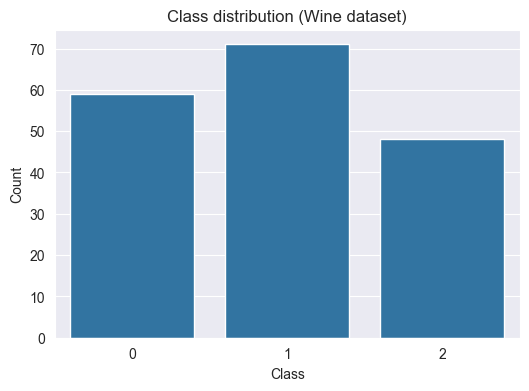

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class distribution (Wine dataset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [38]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Train shape: (142, 13)
Test shape: (36, 13)

Train class distribution:
target
1    0.401408
0    0.330986
2    0.267606
Name: proportion, dtype: float64

Test class distribution:
target
1    0.388889
0    0.333333
2    0.277778
Name: proportion, dtype: float64


In [39]:
baseline_rf = RandomForestClassifier(random_state=RANDOM_STATE)
baseline_rf.fit(X_train, y_train)

y_pred_baseline = baseline_rf.predict(X_test)


In [40]:
def evaluate_classifier(y_true, y_pred):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average="macro"),
        "precision_weighted": precision_score(y_true, y_pred, average="weighted"),
        "recall_macro": recall_score(y_true, y_pred, average="macro"),
        "recall_weighted": recall_score(y_true, y_pred, average="weighted"),
        "f1_macro": f1_score(y_true, y_pred, average="macro"),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted"),
    }
    return metrics


In [41]:
baseline_metrics = evaluate_classifier(y_test, y_pred_baseline)
print("Baseline metrics:")
for k, v in baseline_metrics.items():
    print(f"{k}: {v:.3f}")


Baseline metrics:
accuracy: 1.000
precision_macro: 1.000
precision_weighted: 1.000
recall_macro: 1.000
recall_weighted: 1.000
f1_macro: 1.000
f1_weighted: 1.000


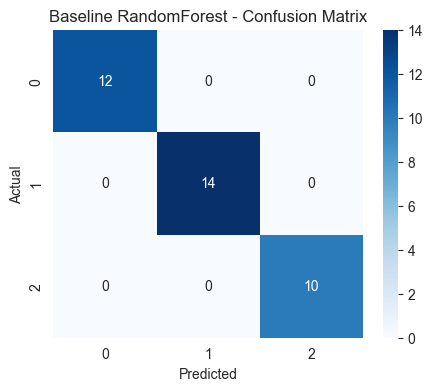


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [42]:
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline RandomForest - Confusion Matrix")
plt.show()

print("\nClassification report:")
print(classification_report(y_test, y_pred_baseline))


In [43]:
param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 15],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}


In [44]:
tuned_rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_distributions=param_dist,
    n_iter=10,               # small for demo; increase if you want
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    random_state=RANDOM_STATE
)

tuned_rf_search.fit(X_train, y_train)

print("Best params:", tuned_rf_search.best_params_)
print("Best CV f1_macro:", tuned_rf_search.best_score_)


Best params: {'n_estimators': 50, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
Best CV f1_macro: 0.9863203463203462


In [45]:
tuned_rf = tuned_rf_search.best_estimator_
y_pred_tuned = tuned_rf.predict(X_test)

tuned_metrics = evaluate_classifier(y_test, y_pred_tuned)

print("\nTuned model metrics:")
for k, v in tuned_metrics.items():
    print(f"{k}: {v:.3f}")



Tuned model metrics:
accuracy: 1.000
precision_macro: 1.000
precision_weighted: 1.000
recall_macro: 1.000
recall_weighted: 1.000
f1_macro: 1.000
f1_weighted: 1.000


In [46]:
comparison = pd.DataFrame([baseline_metrics, tuned_metrics],
                          index=["baseline", "tuned"]).T
comparison


baseline  tuned
accuracy                 1.0    1.0
precision_macro          1.0    1.0
precision_weighted       1.0    1.0
recall_macro             1.0    1.0
recall_weighted          1.0    1.0
f1_macro                 1.0    1.0
f1_weighted              1.0    1.0

In [47]:
# copy training data
X_train_imb = X_train.copy()
y_train_imb = y_train.copy()

# choose class to downsample
minority_class = 0

idx_class = y_train_imb[y_train_imb == minority_class].index
np.random.seed(RANDOM_STATE)
idx_to_drop = np.random.choice(idx_class,
                               size=len(idx_class) // 2,
                               replace=False)

X_train_imb = X_train_imb.drop(idx_to_drop)
y_train_imb = y_train_imb.drop(idx_to_drop)

print("Original train class counts:")
print(y_train.value_counts())
print("\nImbalanced train class counts:")
print(y_train_imb.value_counts())


Original train class counts:
target
1    57
0    47
2    38
Name: count, dtype: int64

Imbalanced train class counts:
target
1    57
2    38
0    24
Name: count, dtype: int64



Imbalanced model metrics:
accuracy: 1.000
precision_macro: 1.000
precision_weighted: 1.000
recall_macro: 1.000
recall_weighted: 1.000
f1_macro: 1.000
f1_weighted: 1.000


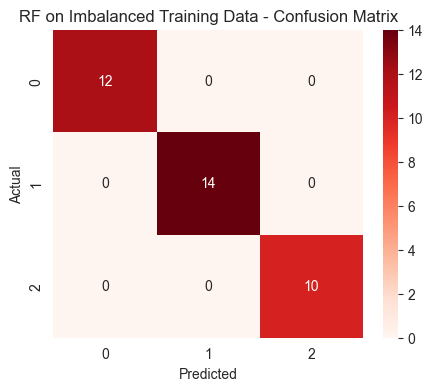

In [48]:
rf_imbalanced = RandomForestClassifier(random_state=RANDOM_STATE)
rf_imbalanced.fit(X_train_imb, y_train_imb)

y_pred_imbalanced = rf_imbalanced.predict(X_test)
imbalanced_metrics = evaluate_classifier(y_test, y_pred_imbalanced)

print("\nImbalanced model metrics:")
for k, v in imbalanced_metrics.items():
    print(f"{k}: {v:.3f}")

cm_imb = confusion_matrix(y_test, y_pred_imbalanced)
plt.figure(figsize=(5,4))
sns.heatmap(cm_imb, annot=True, fmt="d", cmap="Reds",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RF on Imbalanced Training Data - Confusion Matrix")
plt.show()



Imbalanced + class_weight='balanced' metrics:
accuracy: 1.000
precision_macro: 1.000
precision_weighted: 1.000
recall_macro: 1.000
recall_weighted: 1.000
f1_macro: 1.000
f1_weighted: 1.000


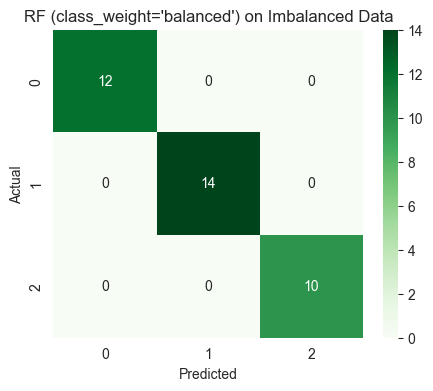

In [49]:
rf_imbalanced_balanced = RandomForestClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced"
)

rf_imbalanced_balanced.fit(X_train_imb, y_train_imb)

y_pred_imb_bal = rf_imbalanced_balanced.predict(X_test)
imbalanced_bal_metrics = evaluate_classifier(y_test, y_pred_imb_bal)

print("\nImbalanced + class_weight='balanced' metrics:")
for k, v in imbalanced_bal_metrics.items():
    print(f"{k}: {v:.3f}")

cm_imb_bal = confusion_matrix(y_test, y_pred_imb_bal)
plt.figure(figsize=(5,4))
sns.heatmap(cm_imb_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RF (class_weight='balanced') on Imbalanced Data")
plt.show()


In [50]:
all_metrics = pd.DataFrame(
    [baseline_metrics, imbalanced_metrics, imbalanced_bal_metrics],
    index=["baseline (balanced data)",
           "default RF (imbalanced)",
           "RF class_weight=balanced (imbalanced)"]
)
all_metrics


accuracy  precision_macro  \
baseline (balanced data)                    1.0              1.0   
default RF (imbalanced)                     1.0              1.0   
RF class_weight=balanced (imbalanced)       1.0              1.0   

                                       precision_weighted  recall_macro  \
baseline (balanced data)                              1.0           1.0   
default RF (imbalanced)                               1.0           1.0   
RF class_weight=balanced (imbalanced)                 1.0           1.0   

                                       recall_weighted  f1_macro  f1_weighted  
baseline (balanced data)                           1.0       1.0          1.0  
default RF (imbalanced)                            1.0       1.0          1.0  
RF class_weight=balanced (imbalanced)              1.0       1.0          1.0

In [51]:
best_model = tuned_rf  # or baseline_rf if you prefer

importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


flavanoids                      0.227242
color_intensity                 0.166790
proline                         0.147791
hue                             0.095004
alcohol                         0.094122
od280/od315_of_diluted_wines    0.078379
total_phenols                   0.058369
magnesium                       0.038157
malic_acid                      0.027877
alcalinity_of_ash               0.017914
dtype: float64

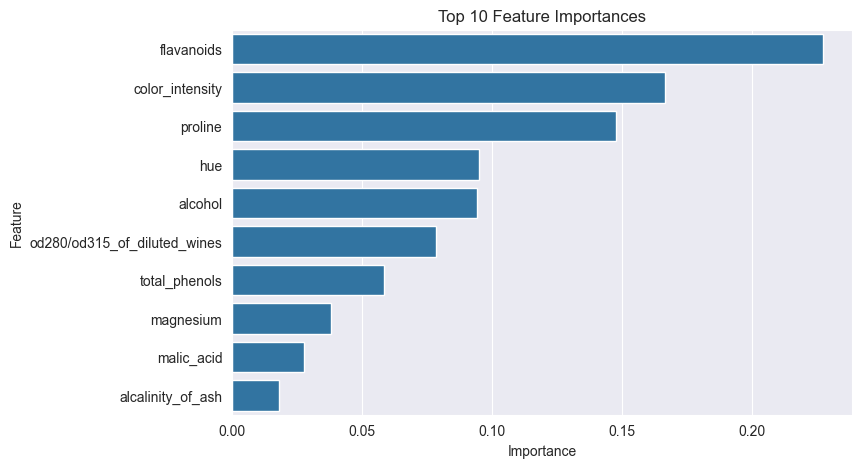

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [53]:
top3_features = importances.head(3).index.tolist()
print("Top 3 features:", top3_features)


Top 3 features: ['flavanoids', 'color_intensity', 'proline']


In [54]:
X_train_top3 = X_train[top3_features]
X_test_top3 = X_test[top3_features]

rf_top3 = RandomForestClassifier(random_state=RANDOM_STATE)
rf_top3.fit(X_train_top3, y_train)

y_pred_top3 = rf_top3.predict(X_test_top3)

top3_metrics = evaluate_classifier(y_test, y_pred_top3)

print("\nTop-3-features model metrics:")
for k, v in top3_metrics.items():
    print(f"{k}: {v:.3f}")



Top-3-features model metrics:
accuracy: 1.000
precision_macro: 1.000
precision_weighted: 1.000
recall_macro: 1.000
recall_weighted: 1.000
f1_macro: 1.000
f1_weighted: 1.000


# Boosting

In this part, we dive deeper into advanced non-linear algorithms, focusing on boosting models—a powerful family of ensemble methods known for their high predictive performance. You’ll get hands-on experience with popular libraries such as scikit-learn’s Gradient Boosting, XGBoost, and LightGBM, learning how each differs in structure, speed, and handling of overfitting. We’ll explore essential hyperparameters like learning rate, number of estimators, and tree depth, and understand how to tune them effectively for optimal performance. Beyond building accurate models, you'll also learn how to interpret them. This includes using probability calibration techniques to ensure well-calibrated outputs, and applying tools for model explainability such as SHAP and feature importance to better understand predictions—crucial for trust and accountability in real-world applications.

## Boosting:

Boosting is an ensemble learning technique that combines multiple weak learners—typically shallow decision trees—in a sequential manner to create a strong predictive model. Unlike bagging methods such as Random Forest, where each tree is trained independently on a random subset of the data, boosting builds each new model by focusing on the errors made by the previous ones. This is done by assigning higher weights to the misclassified examples, encouraging subsequent learners to correct them. As a result, boosting models tend to reduce both bias and variance, making them highly accurate but also more prone to overfitting if not carefully regularized.

In contrast, bagging (short for bootstrap aggregating) is more focused on reducing variance by training multiple models in parallel on random data samples and aggregating their predictions (e.g., by majority vote or averaging). Random Forest is a classic example of bagging. It’s more robust to overfitting and easier to parallelize than boosting. In summary, bagging aims for stability and robustness, while boosting targets accuracy through correction of mistakes—each approach has its strengths depending on the dataset and problem context.

## Gradient Boosting:

Gradient Boosting is a widely used ensemble learning technique that builds a strong predictive model by combining multiple weak learners—typically decision trees—in a sequential, additive manner. It has become a go-to method for many real-world problems due to its accuracy, flexibility, and ability to capture complex, non-linear relationships in data.

Gradient Boosting for Regression: At its core, gradient boosting for regression aims to minimize a loss function (typically Mean Squared Error) by training decision trees one at a time, where each new tree tries to correct the errors of the model built so far.

💡 How it works:
- Start with a simple model—typically the mean of the target variable for all training samples.
- Compute residuals—the difference between the actual values and the predicted values.
- Train a shallow decision tree to predict the residuals.
- Update the model by adding the new tree’s predictions to the previous ones, scaled by a learning rate.
- Repeat steps 2–4 for a set number of iterations (estimators).

The result is a series of trees that progressively improve the fit of the model by focusing on the parts of the data where the model is currently performing poorly.

## Exercise

In [56]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from sklearn.ensemble import GradientBoostingClassifier

from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical


In [72]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [73]:
RANDOM_STATE = 42

def evaluate_binary_classifier(model_name, y_true, y_pred, y_proba):
    """Return a dictionary of metrics for easy comparison."""
    return {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
    }


In [74]:
RANDOM_STATE = 42

def evaluate_binary_classifier(model_name, y_true, y_pred, y_proba):
    """Return a dictionary of metrics for easy comparison."""
    return {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
    }


In [75]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)
print("Class distribution:\n", y.value_counts())


X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']
Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train class ratio:\n", y_train.value_counts(normalize=True))
print("\nTest class ratio:\n", y_test.value_counts(normalize=True))


Train class ratio:
 target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Test class ratio:
 target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


In [77]:
gb_baseline = GradientBoostingClassifier(random_state=RANDOM_STATE)

t0 = time.perf_counter()
gb_baseline.fit(X_train, y_train)
train_time_gb_baseline = time.perf_counter() - t0

t0 = time.perf_counter()
y_pred_gb = gb_baseline.predict(X_test)
y_proba_gb = gb_baseline.predict_proba(X_test)[:, 1]
inference_time_gb_baseline = time.perf_counter() - t0

metrics_gb_baseline = evaluate_binary_classifier(
    "GB_baseline", y_test, y_pred_gb, y_proba_gb
)

print("GradientBoosting - baseline metrics")
for k, v in metrics_gb_baseline.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Train time: {train_time_gb_baseline:.4f} s")
print(f"Inference time (test set): {inference_time_gb_baseline:.6f} s")


GradientBoosting - baseline metrics
accuracy: 0.956
precision: 0.947
recall: 0.986
f1: 0.966
roc_auc: 0.991
Train time: 0.2389 s
Inference time (test set): 0.000991 s


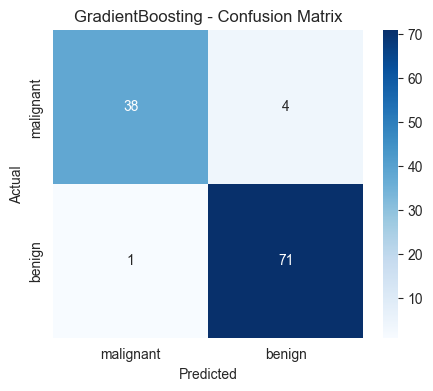

In [78]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GradientBoosting - Confusion Matrix")
plt.show()


In [79]:
gb_search_space = {
    "n_estimators": Integer(50, 300),
    "learning_rate": Real(0.01, 0.2, prior="log-uniform"),
    "max_depth": Integer(2, 6),
    "subsample": Real(0.6, 1.0),
    "max_features": Categorical(["sqrt", "log2", None]),
}

gb_bayes = BayesSearchCV(
    estimator=GradientBoostingClassifier(random_state=RANDOM_STATE),
    search_spaces=gb_search_space,
    n_iter=30,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=0
)

t0 = time.perf_counter()
gb_bayes.fit(X_train, y_train)
gb_bayes_time = time.perf_counter() - t0

print("Best params (GB):", gb_bayes.best_params_)
print("Best CV ROC AUC (GB):", gb_bayes.best_score_)
print(f"Bayesian search time (GB): {gb_bayes_time:.2f} s")


Best params (GB): OrderedDict({'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 198, 'subsample': 0.6})
Best CV ROC AUC (GB): 0.9943240454076367
Bayesian search time (GB): 12.65 s


In [80]:
gb_best = gb_bayes.best_estimator_

t0 = time.perf_counter()
y_pred_gb_best = gb_best.predict(X_test)
y_proba_gb_best = gb_best.predict_proba(X_test)[:, 1]
inference_time_gb_best = time.perf_counter() - t0

metrics_gb_best = evaluate_binary_classifier(
    "GB_tuned", y_test, y_pred_gb_best, y_proba_gb_best
)

print("\nGradientBoosting - tuned metrics")
for k, v in metrics_gb_best.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Inference time (test set): {inference_time_gb_best:.6f} s")



GradientBoosting - tuned metrics
accuracy: 0.956
precision: 0.959
recall: 0.972
f1: 0.966
roc_auc: 0.995
Inference time (test set): 0.001480 s



Top 10 GB feature importances:
worst radius            0.277321
worst perimeter         0.217139
worst concave points    0.162537
mean concave points     0.069299
worst texture           0.031142
area error              0.025897
mean perimeter          0.025300
worst area              0.024505
worst compactness       0.021440
smoothness error        0.018456
dtype: float64


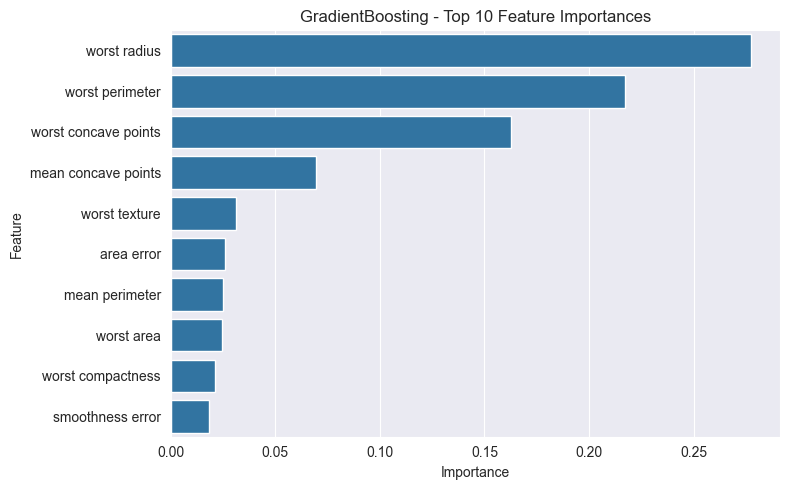

In [81]:
gb_importances = pd.Series(
    gb_best.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 GB feature importances:")
print(gb_importances.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=gb_importances.head(10), y=gb_importances.head(10).index)
plt.title("GradientBoosting - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [82]:
xgb_baseline = XGBClassifier(
    random_state=RANDOM_STATE,
    eval_metric="logloss",    # avoids warnings
    use_label_encoder=False
)

t0 = time.perf_counter()
xgb_baseline.fit(X_train, y_train)
train_time_xgb_baseline = time.perf_counter() - t0

t0 = time.perf_counter()
y_pred_xgb = xgb_baseline.predict(X_test)
y_proba_xgb = xgb_baseline.predict_proba(X_test)[:, 1]
inference_time_xgb_baseline = time.perf_counter() - t0

metrics_xgb_baseline = evaluate_binary_classifier(
    "XGB_baseline", y_test, y_pred_xgb, y_proba_xgb
)

print("\nXGBoost - baseline metrics")
for k, v in metrics_xgb_baseline.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Train time: {train_time_xgb_baseline:.4f} s")
print(f"Inference time (test set): {inference_time_xgb_baseline:.6f} s")



XGBoost - baseline metrics
accuracy: 0.956
precision: 0.947
recall: 0.986
f1: 0.966
roc_auc: 0.990
Train time: 0.0678 s
Inference time (test set): 0.002611 s


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [83]:
xgb_search_space = {
    "n_estimators": Integer(50, 400),
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "max_depth": Integer(2, 8),
    "subsample": Real(0.6, 1.0),
    "colsample_bytree": Real(0.6, 1.0),
    "gamma": Real(0.0, 5.0),
}

xgb_bayes = BayesSearchCV(
    estimator=XGBClassifier(
        random_state=RANDOM_STATE,
        eval_metric="logloss",
        use_label_encoder=False,
        tree_method="hist",     # usually faster
    ),
    search_spaces=xgb_search_space,
    n_iter=30,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=0
)

t0 = time.perf_counter()
xgb_bayes.fit(X_train, y_train)
xgb_bayes_time = time.perf_counter() - t0

print("\nBest params (XGB):", xgb_bayes.best_params_)
print("Best CV ROC AUC (XGB):", xgb_bayes.best_score_)
print(f"Bayesian search time (XGB): {xgb_bayes_time:.2f} s")


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:17] WARNING: /Users/


Best params (XGB): OrderedDict({'colsample_bytree': 0.9612536711277672, 'gamma': 0.0, 'learning_rate': 0.29253981577264243, 'max_depth': 3, 'n_estimators': 364, 'subsample': 0.6})
Best CV ROC AUC (XGB): 0.9915376676986585
Bayesian search time (XGB): 8.02 s


In [84]:
xgb_best = xgb_bayes.best_estimator_

t0 = time.perf_counter()
y_pred_xgb_best = xgb_best.predict(X_test)
y_proba_xgb_best = xgb_best.predict_proba(X_test)[:, 1]
inference_time_xgb_best = time.perf_counter() - t0

metrics_xgb_best = evaluate_binary_classifier(
    "XGB_tuned", y_test, y_pred_xgb_best, y_proba_xgb_best
)

print("\nXGBoost - tuned metrics")
for k, v in metrics_xgb_best.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Inference time (test set): {inference_time_xgb_best:.6f} s")



XGBoost - tuned metrics
accuracy: 0.974
precision: 0.960
recall: 1.000
f1: 0.980
roc_auc: 0.989
Inference time (test set): 0.004429 s



Top 10 XGB feature importances:
mean concave points     0.284025
worst perimeter         0.177060
worst concave points    0.124953
worst area              0.109165
mean area               0.047739
worst radius            0.032783
area error              0.029186
worst concavity         0.025998
concavity error         0.022740
worst texture           0.017700
dtype: float32


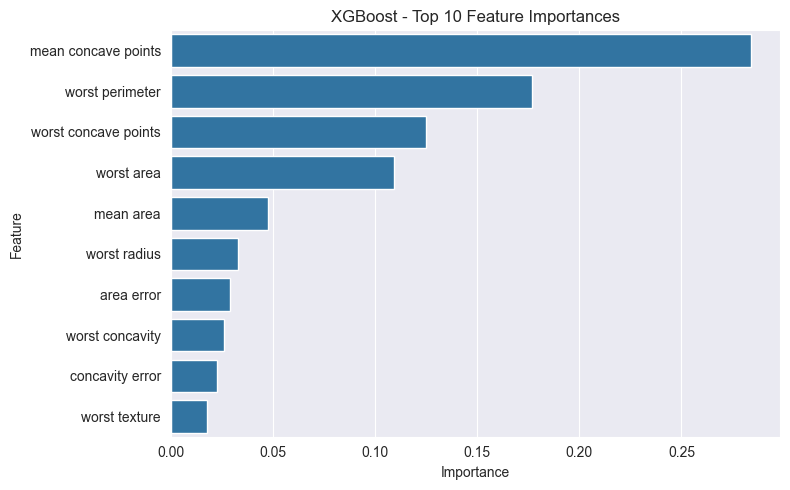

In [85]:
xgb_importances = pd.Series(
    xgb_best.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 XGB feature importances:")
print(xgb_importances.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importances.head(10), y=xgb_importances.head(10).index)
plt.title("XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [86]:
lgb_baseline = LGBMClassifier(random_state=RANDOM_STATE)

t0 = time.perf_counter()
lgb_baseline.fit(X_train, y_train)
train_time_lgb_baseline = time.perf_counter() - t0

t0 = time.perf_counter()
y_pred_lgb = lgb_baseline.predict(X_test)
y_proba_lgb = lgb_baseline.predict_proba(X_test)[:, 1]
inference_time_lgb_baseline = time.perf_counter() - t0

metrics_lgb_baseline = evaluate_binary_classifier(
    "LGBM_baseline", y_test, y_pred_lgb, y_proba_lgb
)

print("\nLightGBM - baseline metrics")
for k, v in metrics_lgb_baseline.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Train time: {train_time_lgb_baseline:.4f} s")
print(f"Inference time (test set): {inference_time_lgb_baseline:.6f} s")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [87]:
lgb_search_space = {
    "n_estimators": Integer(50, 400),
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "max_depth": Integer(-1, 8),     # -1 = no limit
    "num_leaves": Integer(8, 64),
    "subsample": Real(0.6, 1.0),
    "colsample_bytree": Real(0.6, 1.0),
    "min_child_samples": Integer(5, 50),
}

lgb_bayes = BayesSearchCV(
    estimator=LGBMClassifier(random_state=RANDOM_STATE),
    search_spaces=lgb_search_space,
    n_iter=30,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=0
)

t0 = time.perf_counter()
lgb_bayes.fit(X_train, y_train)
lgb_bayes_time = time.perf_counter() - t0

print("\nBest params (LGBM):", lgb_bayes.best_params_)
print("Best CV ROC AUC (LGBM):", lgb_bayes.best_score_)
print(f"Bayesian search time (LGBM): {lgb_bayes_time:.2f} s")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3642
[LightGBM] [Info] Number of positive: 228, number of negative: 136
[LightG

In [88]:
lgb_best = lgb_bayes.best_estimator_

t0 = time.perf_counter()
y_pred_lgb_best = lgb_best.predict(X_test)
y_proba_lgb_best = lgb_best.predict_proba(X_test)[:, 1]
inference_time_lgb_best = time.perf_counter() - t0

metrics_lgb_best = evaluate_binary_classifier(
    "LGBM_tuned", y_test, y_pred_lgb_best, y_proba_lgb_best
)

print("\nLightGBM - tuned metrics")
for k, v in metrics_lgb_best.items():
    if k != "model":
        print(f"{k}: {v:.3f}")
print(f"Inference time (test set): {inference_time_lgb_best:.6f} s")



LightGBM - tuned metrics
accuracy: 0.947
precision: 0.946
recall: 0.972
f1: 0.959
roc_auc: 0.992
Inference time (test set): 0.002696 s



Top 10 LGBM feature importances:
worst concave points    46
worst texture           40
mean concave points     33
mean texture            33
worst perimeter         32
worst area              29
worst radius            26
area error              23
worst smoothness        22
worst symmetry          21
dtype: int32


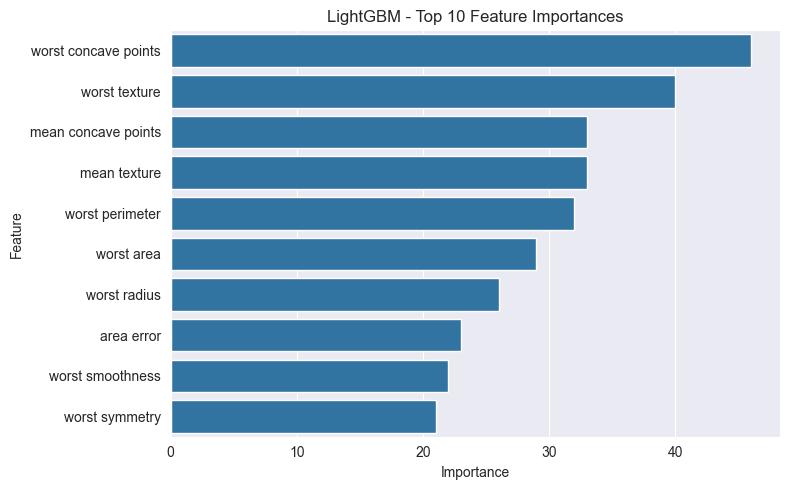

In [89]:
lgb_importances = pd.Series(
    lgb_best.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 LGBM feature importances:")
print(lgb_importances.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=lgb_importances.head(10), y=lgb_importances.head(10).index)
plt.title("LightGBM - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [90]:
metrics_df = pd.DataFrame([
    metrics_gb_baseline,
    metrics_gb_best,
    metrics_xgb_baseline,
    metrics_xgb_best,
    metrics_lgb_baseline,
    metrics_lgb_best,
])

metrics_df.set_index("model", inplace=True)
metrics_df


accuracy  precision    recall        f1   roc_auc
model                                                           
GB_baseline    0.956140   0.946667  0.986111  0.965986  0.990741
GB_tuned       0.956140   0.958904  0.972222  0.965517  0.995370
XGB_baseline   0.956140   0.946667  0.986111  0.965986  0.990079
XGB_tuned      0.973684   0.960000  1.000000  0.979592  0.989087
LGBM_baseline  0.964912   0.959459  0.986111  0.972603  0.989749
LGBM_tuned     0.947368   0.945946  0.972222  0.958904  0.992063

In [91]:
timing_df = pd.DataFrame([
    ["GB_baseline", train_time_gb_baseline, inference_time_gb_baseline],
    ["GB_tuned", None, inference_time_gb_best],   # tuning time is gb_bayes_time
    ["XGB_baseline", train_time_xgb_baseline, inference_time_xgb_baseline],
    ["XGB_tuned", None, inference_time_xgb_best],
    ["LGBM_baseline", train_time_lgb_baseline, inference_time_lgb_baseline],
    ["LGBM_tuned", None, inference_time_lgb_best],
], columns=["model", "train_time", "inference_time"])

timing_df


model  train_time  inference_time
0    GB_baseline    0.238927        0.000991
1       GB_tuned         NaN        0.001480
2   XGB_baseline    0.067801        0.002611
3      XGB_tuned         NaN        0.004429
4  LGBM_baseline    0.306704        0.001977
5     LGBM_tuned         NaN        0.002696

## Probability Calibration:

In many classification problems, it’s not just important to predict the correct class label—but also to assign accurate probabilities to those predictions. For example, in medical diagnosis, knowing that a patient has a 90% chance of having a disease versus 60% can significantly influence decision-making. This is where probability calibration comes in: it ensures that the predicted probabilities truly reflect the real-world likelihood of an outcome.

A model is said to be well-calibrated if, across all instances where it predicts a class with probability p, the true frequency of that class is also p. For example, if a classifier assigns a 70% probability of being positive to 100 samples, then about 70 of those samples should actually belong to the positive class. Unfortunately, many powerful models such as gradient boosting machines or random forests often produce poorly calibrated probabilities, even though they classify accurately.

There are several reasons why models may be poorly calibrated. Tree-based models, in particular, tend to produce probabilities that are biased toward 0 or 1 due to their discrete nature. High-performing classifiers like XGBoost or LightGBM are often optimized for accuracy or AUC—not for probability reliability. On the other hand, models like logistic regression are generally better calibrated out of the box, since they explicitly model probabilities using a logistic function.

To address this, post-processing calibration methods can be applied to improve probability estimates without changing the classifier itself. Two popular techniques are Platt Scaling and Isotonic Regression. Platt Scaling fits a logistic regression model on the model’s predicted scores, while Isotonic Regression uses a non-parametric approach to map predicted scores to calibrated probabilities. Both methods are available in scikit-learn through the CalibratedClassifierCV class, which wraps any existing model and applies calibration using cross-validation.

Probability calibration is especially crucial when predicted probabilities are used in risk scoring, decision thresholds, or cost-sensitive applications. For instance, if a credit scoring system ranks a user with 95% likelihood of default but in reality the default rate is only 30% for similar users, the financial institution might make overly cautious or unfair decisions.

In summary, while high accuracy is often the main goal in classification tasks, well-calibrated probabilities add an essential layer of reliability and trust. In many real-world deployments, calibration is not a luxury but a necessity—particularly when outcomes carry serious consequences or costs.

Below are simple and clear examples showing how to apply Platt Scaling and Isotonic Regression for probability calibration using CalibratedClassifierCV from scikit-learn.

We’ll use the Breast Cancer dataset and a Random Forest Classifier as the base model.

Log loss (Platt): 0.11365797794544798
Brier score loss (Platt): 0.03071170452171861
ROC AUC (Platt): 0.9945492662473795
Log loss (Isotonic): 0.11025282481655546
Brier score loss (Isotonic): 0.03393108898781862
ROC AUC (Isotonic): 0.9932914046121594


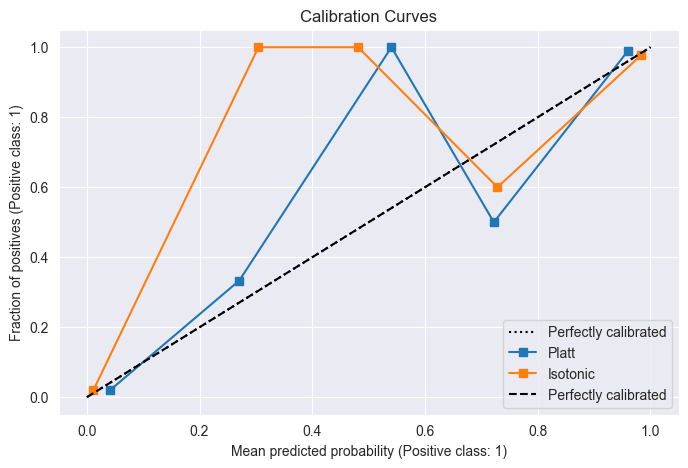

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import (CalibratedClassifierCV, CalibrationDisplay,
																	calibration_curve)
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
import matplotlib.pyplot as plt

# Load and split data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Base model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Platt scaling (sigmoid method)
platt_model = CalibratedClassifierCV(estimator=rf, method='sigmoid', cv=5)
platt_model.fit(X_train, y_train)

# Predictions
probs = platt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Log loss (Platt):", log_loss(y_test, probs))
print("Brier score loss (Platt):", brier_score_loss(y_test, probs))
print("ROC AUC (Platt):", roc_auc_score(y_test, probs))

# Isotonic regression method (non-parametric)
iso_model = CalibratedClassifierCV(estimator=rf, method='isotonic', cv=5)
iso_model.fit(X_train, y_train)

# Predictions
probs = iso_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Log loss (Isotonic):", log_loss(y_test, probs))
print("Brier score loss (Isotonic):", brier_score_loss(y_test, probs))
print("ROC AUC (Isotonic):", roc_auc_score(y_test, probs))

# Plot reliability diagram
fig, ax = plt.subplots(figsize=(8, 5))
CalibrationDisplay.from_estimator(platt_model, X_test, y_test, name="Platt", ax=ax)
CalibrationDisplay.from_estimator(iso_model, X_test, y_test, name="Isotonic", ax=ax)
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.legend()
plt.title("Calibration Curves")
plt.show()

### 🔢 1. Log Loss (a.k.a. Logistic Loss / Cross-Entropy)
Log loss measures how confident and correct your probability predictions are.
- If you predict 0.99 and the answer is 1 → great
- If you predict 0.99 and the answer is 0 → massive penalty
- If you predict 0.51 and the answer is 1 → small penalty

### 🌧 2. Brier Score
Brier Score measures how far your probability predictions are from the truth, on average. It's literally the mean squared error of probabilities.
- Lower is better
- Range is usually between 0 and 1



# Model Explainability:

As machine learning models grow more complex, understanding why a model makes a certain prediction becomes just as important as the prediction itself. This is especially true in regulated industries like finance or healthcare, where transparency and accountability are critical. Gradient Boosting Classifiers—such as those built with XGBoost, LightGBM, or scikit-learn—are powerful but inherently opaque. Unlike simpler models (e.g., logistic regression), their predictions result from the collective behavior of hundreds of decision trees, making direct interpretation difficult.

This is where SHAP (SHapley Additive exPlanations) comes in. SHAP values provide a game-theoretic approach to model explainability by assigning each feature an importance value for a particular prediction. In essence, SHAP breaks down a prediction to show how much each feature contributed positively or negatively to the final output. This works not just globally (which features matter overall) but also locally (why the model predicted a specific class for an individual data point).

For tree-based models like those used in gradient boosting, SHAP is particularly effective because it offers a fast and accurate approximation via the TreeExplainer method. Still, using SHAP with boosting models requires extra care: the model’s complexity can lead to explanations that are harder to interpret than with linear models, and large feature spaces can produce noisy attribution. Nevertheless, SHAP is currently one of the most robust tools for understanding black-box models, helping users trust, debug, and validate their machine learning systems.

Here’s an example of how to use SHAP to explain predictions made by a Gradient Boosting Classifier, using the breast cancer dataset from scikit-learn.

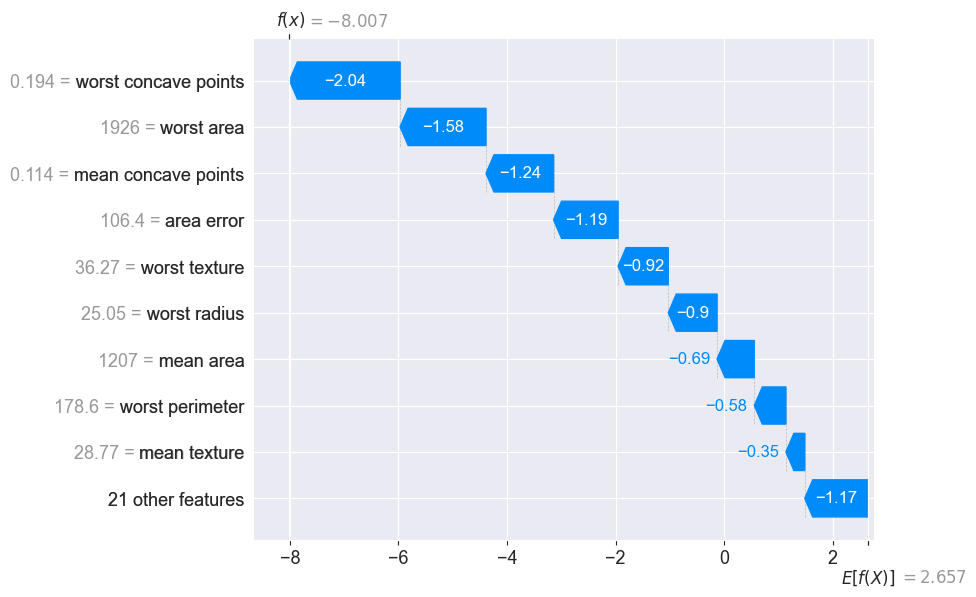

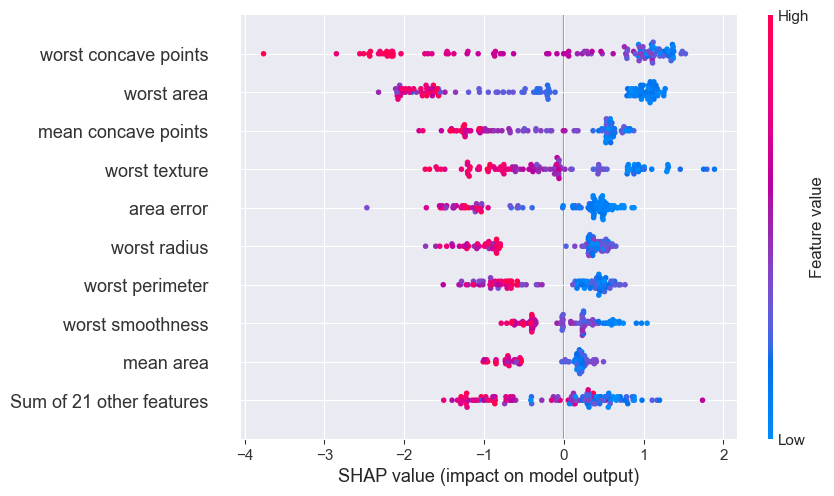

In [8]:
import shap
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42, stratify=y)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
 max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Explain predictions with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values for the first prediction
shap.plots.waterfall(shap_values[0])

# Global feature importance (summary plot)
shap.plots.beeswarm(shap_values)

## Ensemble Models:

Ensemble models combine the strengths of multiple individual models (called base learners) to produce more accurate and robust predictions. The intuition is simple: while a single model might make mistakes, combining multiple models—especially diverse ones—can help average out errors and improve generalization. Common ensemble techniques include bagging (e.g., Random Forest), boosting (e.g., Gradient Boosting, XGBoost), and stacking, where the outputs of several base models are fed into a meta-model.

The key value of ensemble models lies in their reduced variance, bias, or both, depending on the strategy. Bagging reduces variance by training each base learner on a different random subset of the data and averaging their predictions. Boosting focuses on reducing bias by training models sequentially—each new model correcting the errors of the previous ones. These methods often outperform single models, particularly on noisy or complex datasets. Ensemble methods are widely used in real-world applications and consistently perform well in machine learning competitions like Kaggle.

Here’s how you can create an ensemble using scikit-learn:

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define base models
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('gb', gb)],
    voting='hard'
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))

Ensemble Accuracy: 1.0


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Exercise

In [22]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", data.target_names)
print("Class distribution:\n", y.value_counts())

X shape: (569, 30)
y shape: (569,)
Classes: ['malignant' 'benign']
Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
baseline_model = GradientBoostingClassifier(random_state=42)

baseline_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [25]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)

# Performance Metrics
results_model = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("\nModel Performance Summary:")
for k, v in results_model.items():
    print(f"{k}: {v:.4f}")



Model Performance Summary:
Accuracy: 0.9561
Precision: 0.9467
Recall: 0.9861
F1: 0.9660
ROC AUC: 0.9907


Log loss (Isotonic): 0.13164236943004637
Brier score loss (Isotonic): 0.03964385951367625
ROC AUC (Isotonic): 0.9907407407407408


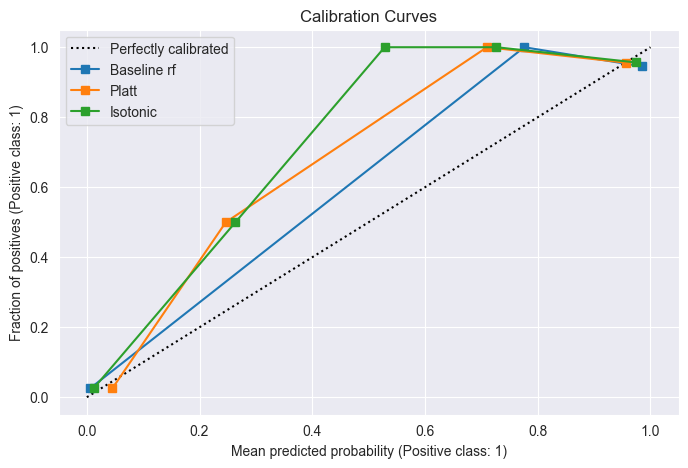

In [26]:
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import (CalibratedClassifierCV, CalibrationDisplay,
																	calibration_curve)

# Platt scaling (sigmoid method)
platt_model = CalibratedClassifierCV(estimator=rf, method='sigmoid', cv=5)
platt_model.fit(X_train, y_train)


# Isotonic regression method (non-parametric)
iso_model = CalibratedClassifierCV(estimator=rf, method='isotonic', cv=5)
iso_model.fit(X_train, y_train)


# Evaluation
print("Log loss (Isotonic):", log_loss(y_test, y_prob))
print("Brier score loss (Isotonic):", brier_score_loss(y_test, y_prob))
print("ROC AUC (Isotonic):", roc_auc_score(y_test, y_prob))

# Plot reliability diagram
fig, ax = plt.subplots(figsize=(8, 5))
CalibrationDisplay.from_estimator(baseline_model, X_test, y_test, name="Baseline rf", ax=ax)
CalibrationDisplay.from_estimator(platt_model, X_test, y_test, name="Platt", ax=ax)
CalibrationDisplay.from_estimator(iso_model, X_test, y_test, name="Isotonic", ax=ax)
plt.legend()
plt.title("Calibration Curves")
plt.show()

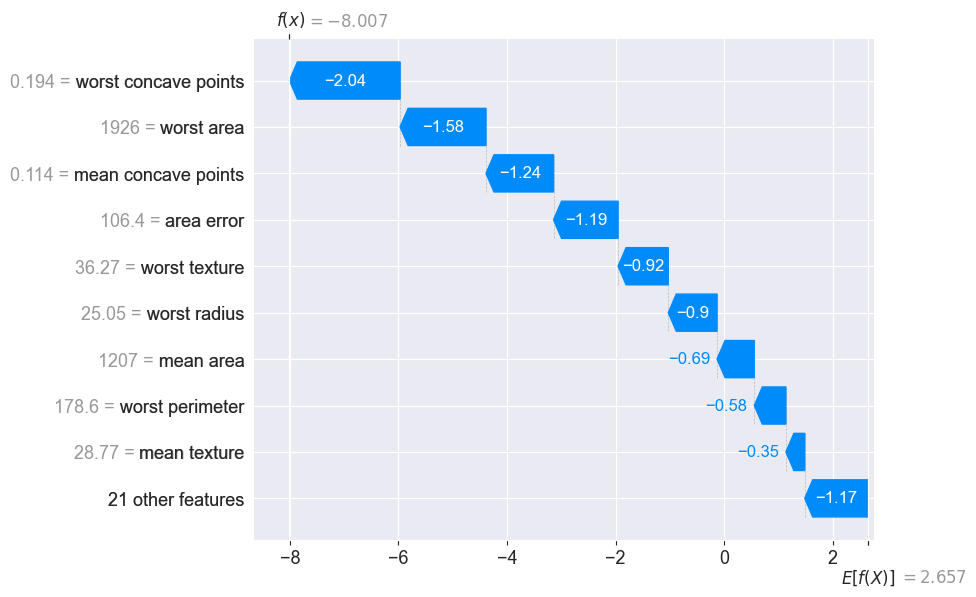

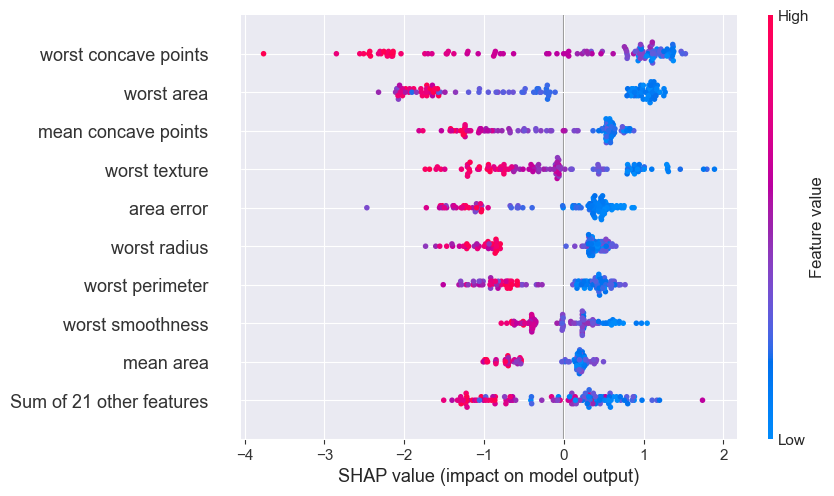

In [27]:
# Explain predictions with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values for the first prediction
shap.plots.waterfall(shap_values[0])

# Global feature importance (summary plot)
shap.plots.beeswarm(shap_values)

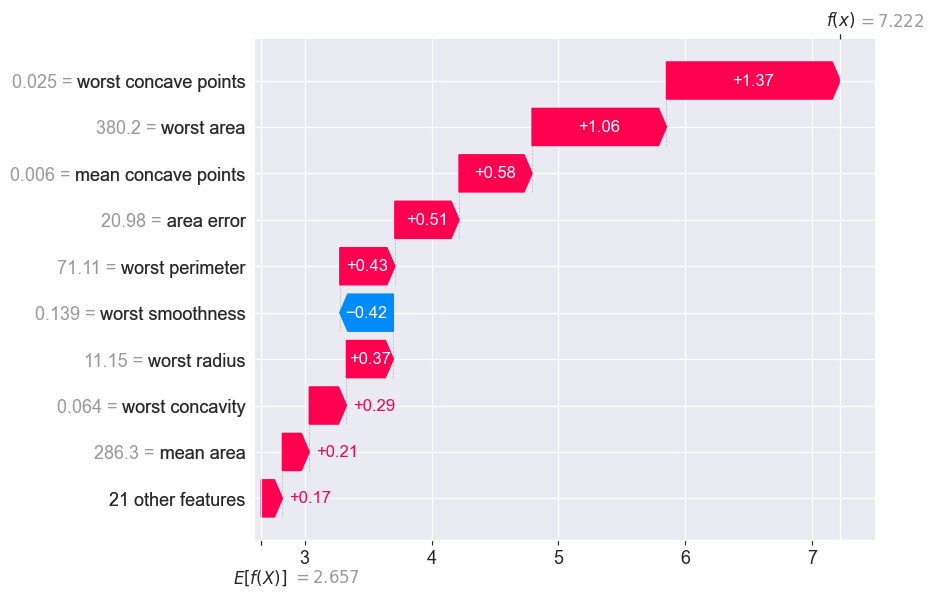

In [31]:
# Take a random record, predict and explkain results.

# Pick ANY test sample (e.g., the 7th one)
i = 22

# Show the waterfall plot for that individual prediction
shap.plots.waterfall(shap_values[i])


In [34]:
#Build an ensemble classifier using at least three base learners (e.g., Logistic Regression, Random Forest, and Gradient Boosting) with VotingClassifier from scikit-learn. Use soft voting.

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define base models
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create ensemble (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('gb', gb)],
    voting='soft'
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))



/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.956140350877193


In [36]:
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_recall_curve,
    auc
)

# Predictions
ensemble_pred = voting_clf.predict(X_test)
ensemble_probs = voting_clf.predict_proba(X_test)[:, 1]

# Balanced accuracy
ensemble_bal_acc = balanced_accuracy_score(y_test, ensemble_pred)

# PR AUC
prec_e, rec_e, _ = precision_recall_curve(y_test, ensemble_probs)
ensemble_pr_auc = auc(rec_e, prec_e)

print("\n=== Ensemble (Soft Voting) ===")
print("Balanced Accuracy:", round(ensemble_bal_acc, 4))
print("PR AUC:", round(ensemble_pr_auc, 4))


=== Ensemble (Soft Voting) ===
Balanced Accuracy: 0.9454
PR AUC: 0.9973
